In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

lookup = pd.read_excel('Lookup_Table.xlsx')
lookup2 = pd.read_excel('Lookup_Table.xlsx',sheet_name=1)
trans = pd.read_csv('Transactions.csv')
active = pd.read_csv('active_members_(1).csv')

print(lookup.shape[0] == len(lookup['Profit Center'].unique()))

print(lookup2.shape[0] == len(lookup2['Membership Type'].unique()))

#Transactions.csv- add a column to this data structure titled “consolidated_profit_centers” using the file “Lookup Table”, Tab = “Transactions”
dict_lookup = dict(zip(lookup['Profit Center'], lookup['Consolidated Profit Centers']))
trans['consolidated_profit_centers'] = trans['Profit Center'].map(dict_lookup)

#Active_members(1).csv- add a column to this data structure titled “consolidated_mem_types” using the file “Lookup Table”, Tab = “Membership_Types”
dict_lookup2 = dict(zip(lookup2['Membership Type'], lookup2['Membership Type Consolidated']))
active['consolidated_mem_types'] = active['Membership Type'].map(dict_lookup2)

True
True


In [2]:
active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17083 entries, 0 to 17082
Data columns (total 6 columns):
Club Number               17083 non-null int64
Agreement Number          17083 non-null int64
Membership Type           17083 non-null object
Since Date                17083 non-null object
Invoice  Amount           17083 non-null float64
consolidated_mem_types    17083 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 800.8+ KB


In [3]:
#MISSING OR IMPROPER VALUES IN AGREEMENT NUMBER COLUMN
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23086 entries, 0 to 23085
Data columns (total 7 columns):
Payment Made At                23086 non-null int64
Home Club                      23086 non-null int64
Agreement Number               23086 non-null object
Profit Center                  23086 non-null object
Payment Date                   23086 non-null int64
Payment Amount                 23086 non-null float64
consolidated_profit_centers    23086 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ MB


In [4]:
#New trans table free of contamination
transn = trans[trans['Agreement Number'].str.isdigit()==True]
transn['Agreement Number'] = transn['Agreement Number'].astype(int)
#Merge the active_members(1) file to the transactions file using agreement number
trans['Agreement Number'].replace('#VALUE!',0,inplace = True)
trans['Agreement Number'] = pd.to_numeric(trans['Agreement Number'])
df = pd.merge(trans,active,on = 'Agreement Number')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#Summarize transactions by consolidated_profit_centers
dff = trans.groupby(['consolidated_profit_centers'])['Payment Amount'].sum().reset_index()
print(dff)

#Summarize transactions by consolidated_profit_centers
dff = df.groupby(['consolidated_profit_centers'])['Payment Amount'].sum().reset_index()
print(dff)

  consolidated_profit_centers  Payment Amount
0                     Fitness       85231.505
1                  Membership      331272.680
2             Membership Cash       27529.000
3                       Other        8506.845
4                      Retail       13836.760
  consolidated_profit_centers  Payment Amount
0                     Fitness       76291.575
1                  Membership      327625.080
2             Membership Cash       25170.305
3                       Other        6965.865
4                      Retail        8468.145


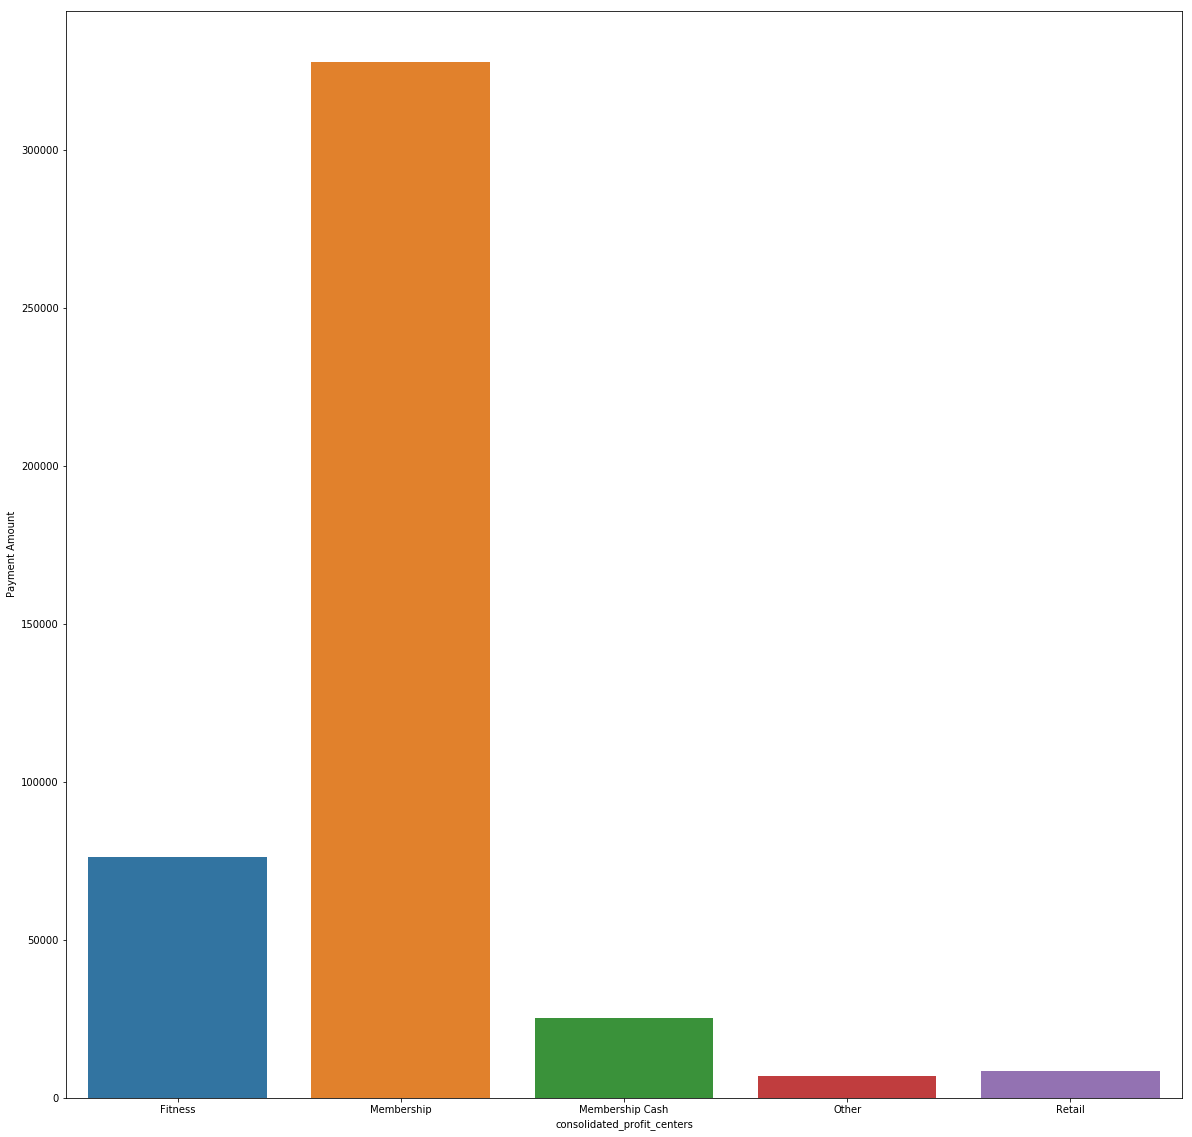

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)

sns.barplot(x = 'consolidated_profit_centers' , y = 'Payment Amount',data = dff)

In [7]:
#What is the $ value of transactions broken out by the “payment made at” field?
dff = trans.groupby(['Payment Made At'])['Payment Amount'].sum().reset_index()
print(dff)

#41 new
dff = df.groupby(['Payment Made At'])['Payment Amount'].sum().reset_index()
print(dff)

   Payment Made At  Payment Amount
0              132      161456.420
1             1247      214704.965
2             8144       90215.405
   Payment Made At  Payment Amount
0              132      150483.655
1             1247      205508.365
2             8144       88528.950


In [8]:
#What is the unique count of agreement numbers within each consolidated_profit_center
agree_profit = trans.drop_duplicates(subset=['consolidated_profit_centers','Agreement Number'],keep='first')
[print(i,' : ',agree_profit[agree_profit['consolidated_profit_centers']==i].shape[0]) for i in agree_profit['consolidated_profit_centers'].unique()] 

Retail  :  873
Other  :  752
Membership  :  12100
Fitness  :  1100
Membership Cash  :  658


[None, None, None, None, None]

In [9]:
#total $ amount
agree_profit.groupby('consolidated_profit_centers')['Payment Amount'].sum().reset_index()

,consolidated_profit_centers,Payment Amount
0,Fitness,13128.650
1,Membership,300881.070
2,Membership Cash,22058.510
3,Other,4962.710
4,Retail,3462.255


In [10]:
#unique count
print(agree_profit['consolidated_profit_centers'].value_counts())

Membership         12100
Fitness             1100
Retail               873
Other                752
Membership Cash      658
Name: consolidated_profit_centers, dtype: int64


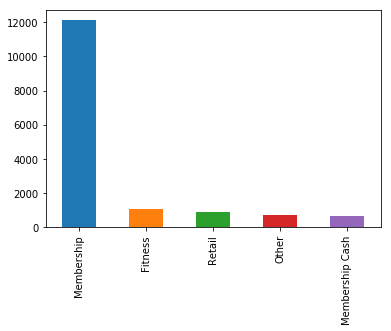

In [11]:
agree_profit['consolidated_profit_centers'].value_counts().plot.bar()

In [12]:
#average value
print(agree_profit.groupby('consolidated_profit_centers')['Payment Amount'].sum()/agree_profit['consolidated_profit_centers'].value_counts())

Fitness            11.935136
Membership         24.866204
Membership Cash    33.523571
Other               6.599348
Retail              3.965928
dtype: float64


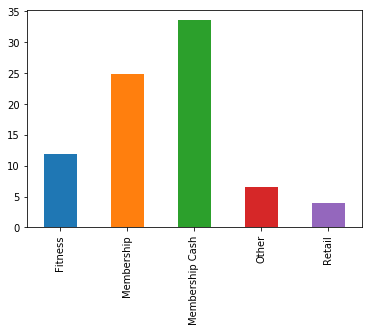

In [13]:
(agree_profit.groupby('consolidated_profit_centers')['Payment Amount'].sum()/agree_profit['consolidated_profit_centers'].value_counts()).plot.bar()

In [14]:
#What is the $ value of each consolidated_profit_center  by “Membership_Types”
dff = df.groupby(['Membership Type','consolidated_profit_centers'])['Payment Amount'].sum().reset_index()
print(dff)

       Membership Type consolidated_profit_centers  Payment Amount
0               ADDLCD                  Membership          10.015
1               EDGECP                     Fitness         106.155
2               EDGECP                  Membership        1836.610
3               EDGECP                       Other          42.425
4               EDGECP                      Retail           5.050
5                 EFIT                     Fitness       38521.775
6                 EFIT                  Membership      212548.540
7                 EFIT             Membership Cash        1725.505
8                 EFIT                       Other        2783.950
9                 EFIT                      Retail        3829.415
10              EFITCO                     Fitness           0.100
11              EFITCO                  Membership          58.585
12              EFITCO                       Other           1.110
13              EFITPF                     Fitness        4037

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


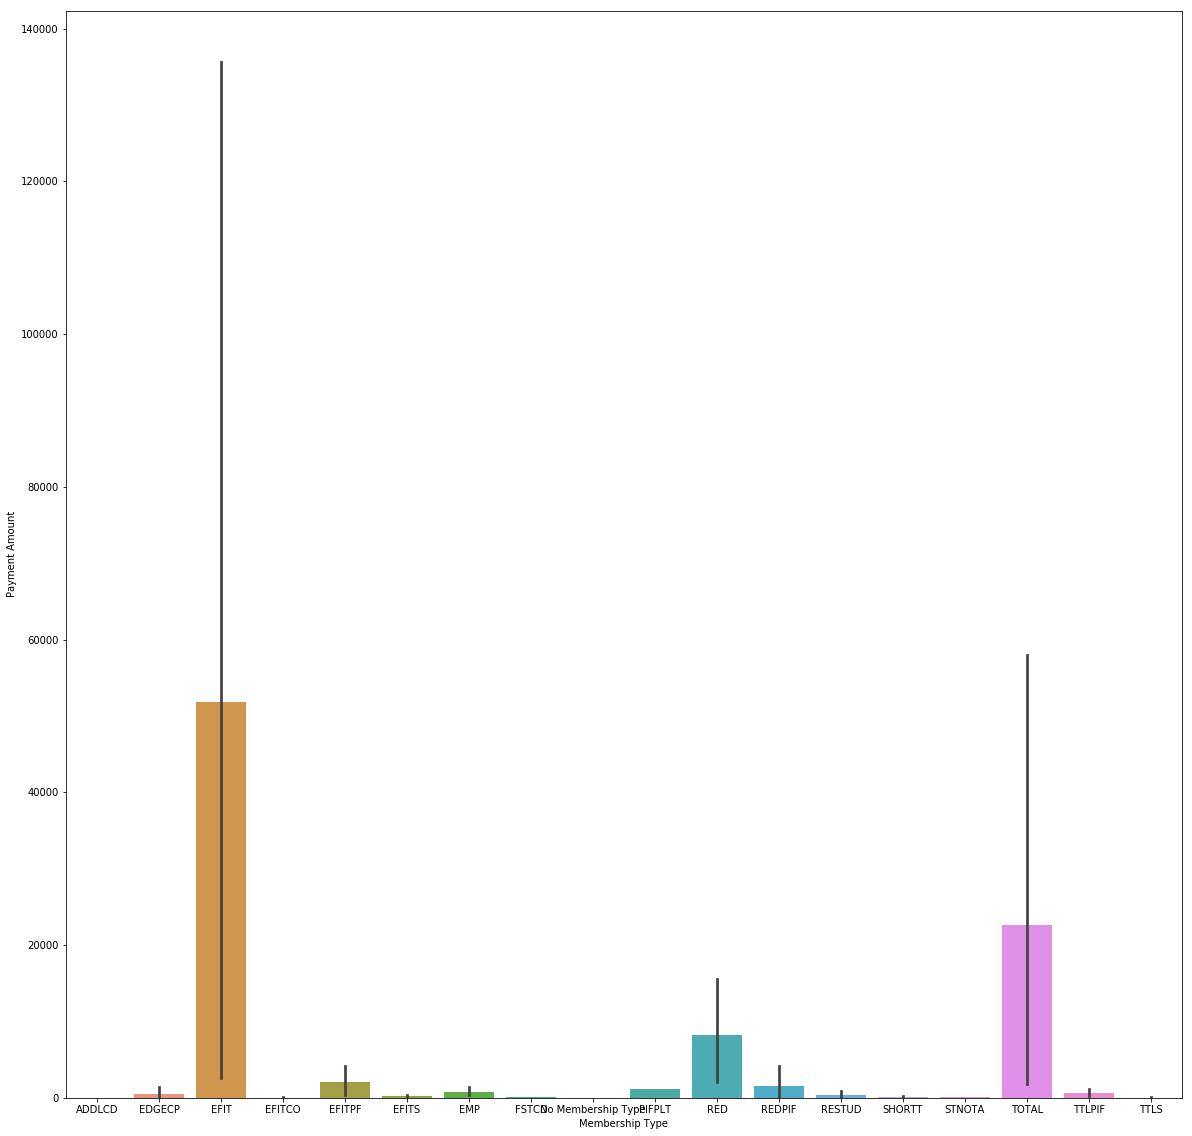

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20,20)

sns.barplot(x = 'Membership Type', y ='Payment Amount',data = dff)

In [16]:
# Adjust payment date to show as a serial date (ex: 09/01/2020)
def timerang(strc):
    temp = datetime.datetime.strptime(str(strc), "%m%d%Y")
    return temp

df['Payment Date'] = df['Payment Date'].apply(timerang)

In [17]:
df['Payment Date']

0       2020-09-10
1       2020-09-01
2       2020-09-16
3       2020-09-04
4       2020-09-22
5       2020-09-01
6       2020-09-02
7       2020-09-08
8       2020-09-09
9       2020-09-14
10      2020-09-17
11      2020-09-21
12      2020-09-21
13      2020-09-24
14      2020-09-25
15      2020-09-29
16      2020-09-04
17      2020-09-30
18      2020-09-14
19      2020-09-01
20      2020-09-14
21      2020-09-22
22      2020-09-17
23      2020-09-17
24      2020-09-14
25      2020-09-14
26      2020-09-08
27      2020-09-08
28      2020-09-09
29      2020-09-09
           ...    
20830   2020-09-22
20831   2020-09-29
20832   2020-09-08
20833   2020-09-08
20834   2020-09-12
20835   2020-09-12
20836   2020-09-21
20837   2020-09-21
20838   2020-09-02
20839   2020-09-24
20840   2020-09-14
20841   2020-09-28
20842   2020-09-01
20843   2020-09-05
20844   2020-09-13
20845   2020-09-24
20846   2020-09-26
20847   2020-09-30
20848   2020-09-08
20849   2020-09-23
20850   2020-09-21
20851   2020

In [18]:
import datetime

In [19]:
#Create a new field in the merged transactions and active_members datasets called “time_range”. This field will be a calculation (shown in years) of today minus the “since date” column in the active_members(1) file. Make sure this field is rounded to the nearest integer. So for example an agreement with a since date of 12/20/2018 would have a “time_range” equal to “2”

def timerange(strc):
    temp = datetime.datetime.strptime(strc, "%m/%d/%Y")
    now = datetime.datetime.now() 
    a = now - temp
    return round(a.days/365)
a = df['Since Date'].astype(str)
df['time_range'] = a.apply(timerange)

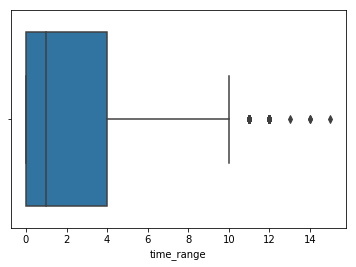

In [20]:
sns.boxplot(x = df['time_range'])

In [21]:
#Summarize $ value of transactions by time_range- include sum total and unique agreement numbers 
def time_split(time):
    if time>0 and time<1:
        return '0-1'
    elif time>=1 and time<2:
        return '1-2'
    elif time>=3 and time<5:
        return '3-5'
    elif time >=5:
        return '5+'
    elif time  == np.NaN:
        return 'NA'
    
df['time split'] = df['time_range'].apply(time_split)

df.groupby(['time split'])['Payment Amount'].sum()

time split
1-2    128542.490
3-5     76081.605
5+     132873.115
Name: Payment Amount, dtype: float64

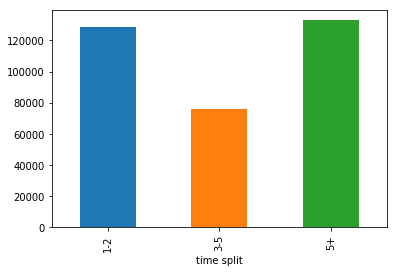

In [22]:
df.groupby(['time split'])['Payment Amount'].sum().plot.bar()

In [23]:
#What is the $ value of the consolidated profit center “fitness” based on payment date? Filter for payment made at = 8144
dff = df[df['Payment Made At']==8144].groupby(['consolidated_profit_centers'])['Payment Amount'].sum().reset_index()
print(dff)

  consolidated_profit_centers  Payment Amount
0                     Fitness       14773.070
1                  Membership       61705.665
2             Membership Cash        8413.585
3                       Other        1171.850
4                      Retail        2464.780


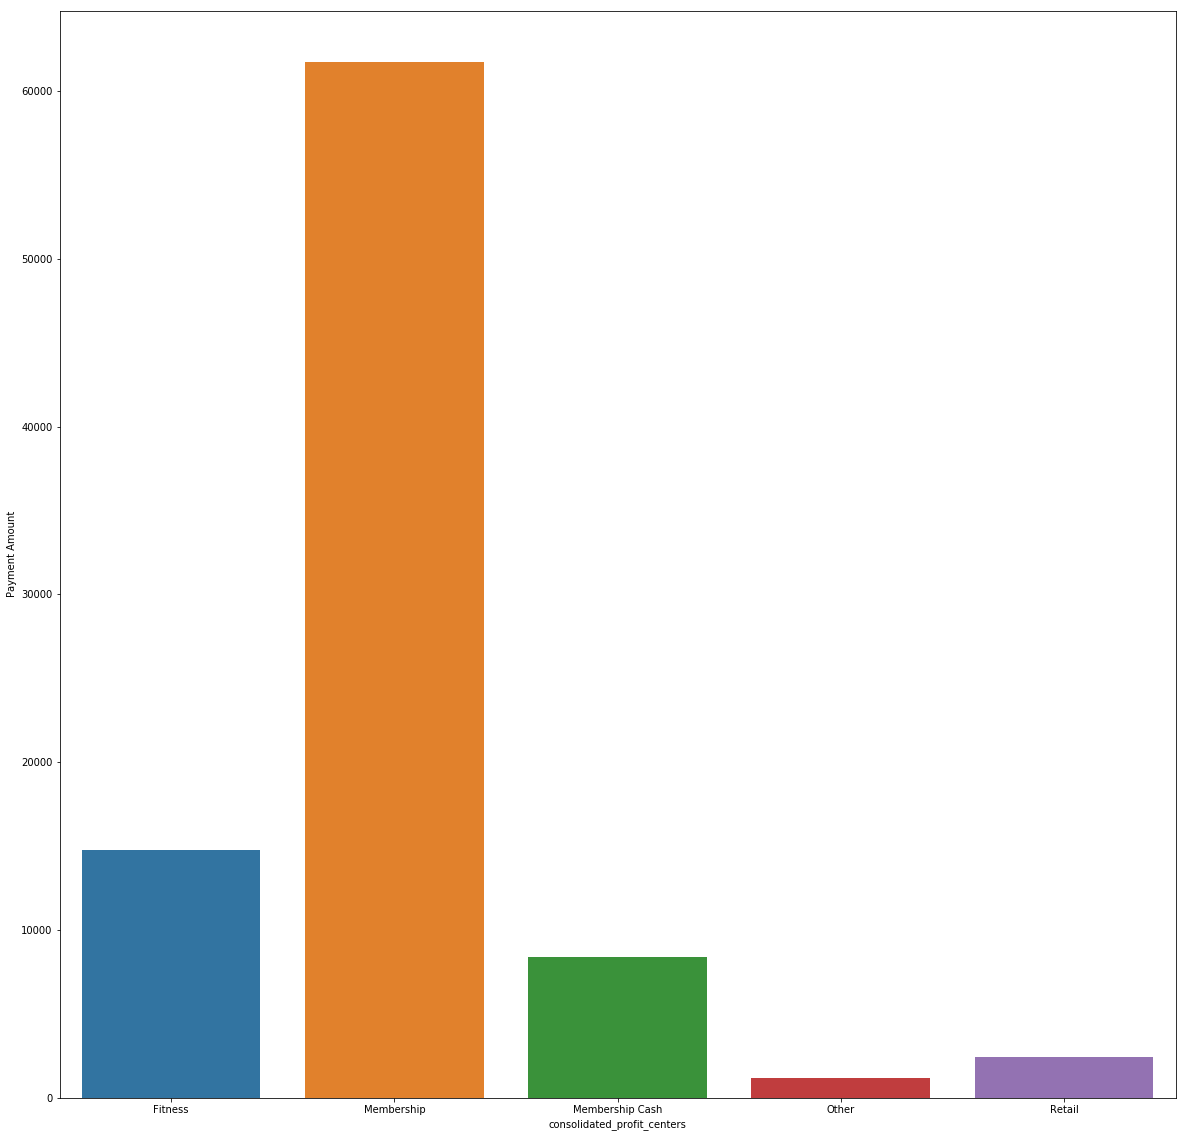

In [24]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20,20)

sns.barplot(x = 'consolidated_profit_centers' , y = 'Payment Amount', data = dff)

In [25]:
#Unique count of agreement numbers in the consolidated profit center “fitness” based on payment date (include unique count of N/A values). Filter for payment made at = 8144
dff = df[df['Payment Made At']==8144]
print(len(dff[df['consolidated_profit_centers'] == "Fitness"]['Agreement Number'].unique()))

453


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
pwd


'C:\\Users\\admin\\Downloads\\Fitness\\Fitness'